# Complex Analysis By Examples

[Edward Lu](https://github.com/edwardlu71)

In [1]:
#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import hsv_to_rgb

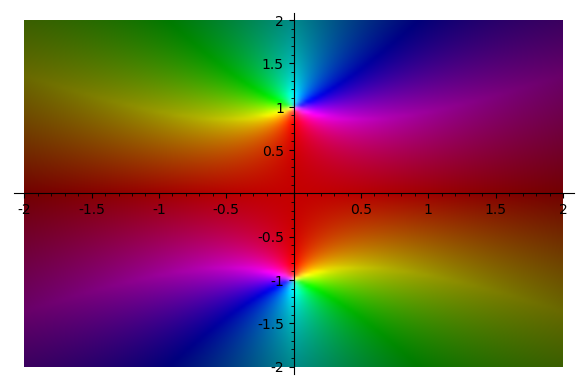

In [2]:
complex_plot(lambda z: 1/(z^2+1), (-2,2), (-2,2))

### Residue
[wiki](https://en.wikipedia.org/wiki/Residue_(complex_analysis))

In [3]:
z = var("z",  domain=CC)
f = 1/(z^2+1)
# find the poles
(1/f == 0).solve(z)

[z == -I, z == I]

In [4]:
# select the first pole
pole = _[0].rhs()

In [5]:
# for simple pole
display((f*(z-pole)).limit(z=pole))
display(f.taylor(z,pole,-1)*(z-pole))

1/2*I

I*(z + I)/(2*z + 2*I)

In [6]:
# for non-simple pole
f(z=z+pole).taylor(z,0,-1).coefficient(z,-1)

1/2*I

## Complex functions

$$ z = x + i y $$
$$ f(z) = f(x + i y) = u(x, y) + i  v(x, y) $$

### Holomorphic functions
Complex functions that are differentiable at every point of an open subset $ \Omega $ of the complex plane are said to be holomorphic on $ \Omega $.

### Cauchy–Riemann equations

For holomorphic function, we have Cauchy–Riemann equations [proof](https://en.wikipedia.org/wiki/Cauchy%E2%80%93Riemann_equations)<br>
$$ \frac{\partial u}{\partial x} = \frac{\partial v}{\partial y} $$
$$ \frac{\partial u}{\partial y} = -\frac{\partial v}{\partial x} $$

### Cauchy's integral theorem
let U be an open subset of C which is simply connected, let f : U → C be a holomorphic function, and let $ \!\,\gamma $  be a rectifiable path in U whose start point is equal to its end point. Then [proof](https://en.wikipedia.org/wiki/Cauchy%E2%80%93Riemann_equations)

$$ \oint _{\gamma }f(z)\,dz=0 $$

### Cauchy's integral formula

Let U be an open subset of the complex plane C, and suppose the closed disk D defined as $ D={\bigl \{}z:|z-z_{0}|\leq r{\bigr \}}$ <br>
is completely contained in U. Let f : U → C be a holomorphic function, and let γ be the circle, oriented counterclockwise, forming the boundary of D. Then for every a in the interior of D, [proof](https://en.wikipedia.org/wiki/Cauchy%27s_integral_formula)

$$ f(a)={\frac {1}{2\pi i}}\oint _{\gamma }{\frac {f(z)}{z-a}}\,dz $$

### Laurent series

a representation of that function as a power series which includes terms of negative degree. It may be used to express complex functions in cases where a Taylor series expansion cannot be applied. Laurent series with complex coefficients are an important tool in complex analysis, especially to investigate the behavior of functions near singularities. 

$$ f(z)=\sum _{n=-\infty }^{\infty }a_{n}(z-c)^{n} $$

$$ a_{n}={\frac {1}{2\pi i}}\oint _{\gamma }{\frac {f(z)}{(z-c)^{n+1}}}\,dz $$

### Types of Singularities

* removeable singularity i.e. $ f(z) = sin(z)/z $ at z=0, it is removeable because if we _define_ f(0) = 1, it is holomorphic function on field CC
* a pole i.e. if  $ \lim _{z\to a}f(z) = \infty $
* essential singularity. i.e. $ f(z)=e^{1/z} $ at z=0, its neither a complex number nor a infinite

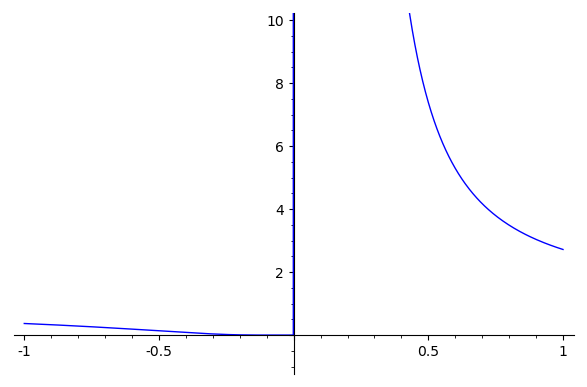

In [7]:
plot(exp(1/x), (x,-1,1)).show(xmin=-1, xmax=1, ymin=-1, ymax=10)

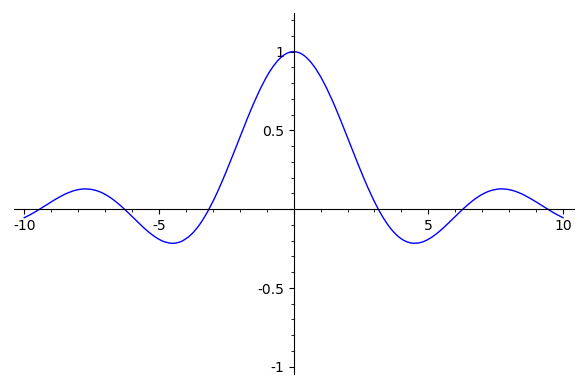

In [8]:
plot(sin(x)/x, (x,-10,10)).show(xmin=-10, xmax=10, ymin=-1, ymax=1.2)

### Residue

Example
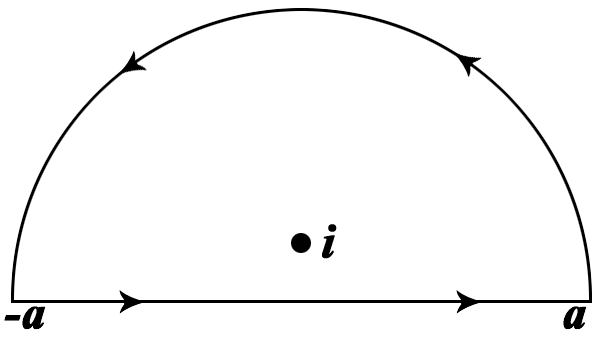

$$ \begin{aligned}
\int_{-\infty}^\infty {e^{itz} \over z^2+1}\,dz & = \int_{-\infty}^\infty \frac{e^{itz}}{2i}\left(\frac{1}{z-i}-\frac{1}{z+i}\right)\,dz \\
& = \int_{-\infty}^\infty \frac{e^{itz}}{2i}\left(\frac{1}{z-i}\right)\,dz \\
& = \large \pi e^{-t} \\
& =  \int (straight) + \int (arc)
\end{aligned}
$$

$$ \begin{aligned}
t >0, a->\infty: \int (arc) & = 0 \\
\int_{-\infty}^{\infty} \frac{e^{itx}}{x^2+1}\,dx & = \large \pi e^{-t} 
\end{aligned}
$$

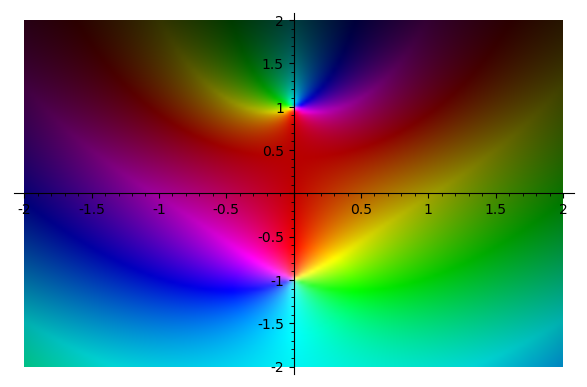

In [9]:
# assume t=1
complex_plot(lambda z: exp(I*z)/(z**2+1), (-2,2), (-2,2))

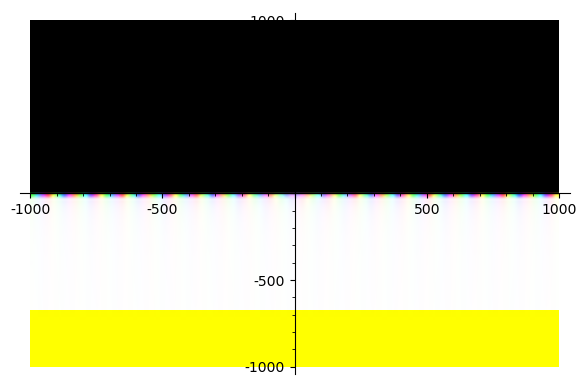

In [10]:
complex_plot(lambda z: exp(I*z)/(z+I), (-1000,1000), (-1000,1000))